# First Notebook for dev issues
We basically reproduce setup.py and define functions or chech variables before updating either tempest/*.py or anything else really 

In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import os
import glob
import sys
import yaml
import xarray as xr

import numpy as np
import matplotlib.pyplot as plt

print(os.getcwd())

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/intro.yaml'

# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, overwrite = True)
gr = grid.Grid(hdlr, overwrite = True, verbose = False)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    gr.compute_funcs_for_var_id("Prec")
    # gr.compute_funcs_for_var_id("MCS_label")
    pass

/home/mcarenso/code/tempest
Overwriting the existing variables in output/intro/DYAMOND_SAM_ITCZ_intro/var_id_days_i_t.json
Variables data retrieved. Saving them in output/intro/DYAMOND_SAM_ITCZ_intro/var_id_days_i_t.json
Data saved as output/intro/DYAMOND_SAM_ITCZ_intro/var_id_days_i_t.json
Found json file at {json_path}, loading it..
Data loaded from output/intro/DYAMOND_SAM_ITCZ_intro/var_id_days_i_t.json

 Woah,
 the netcdf for this variable Prec didn't exist yet, let's make it from scratch : 

These keys : ['max_Prec', 'mean_Prec'] have to be computed.


In [4]:
gr.compute_funcs_for_var_id("MCS_label")

These keys : ['MCS_label'] have to be computed.
0..10..0..10..

In [5]:
jd = joint_distrib.JointDistribution(gr, nd=3, storm_tracking=True)

/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160901-20160910.dat.gz
/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking/TOOCAN-GLOBAL-20160801-20160831.dat.gz


## DO MCS_labels stuff from explore_conditional_multiscale_extremes.ipynb

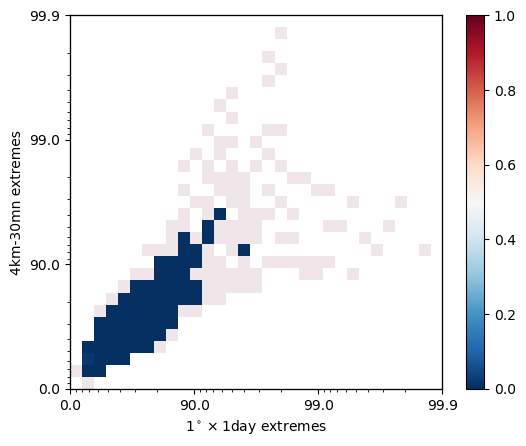

In [6]:
%matplotlib inline
data, noise = jd.get_mcs_bin_fraction()
jd.plot_data(data, noise, False)

In [25]:
A_max = storm_attributes_on_jdist(jd, ['surfmaxkm2_172Wm2'], ['max'])
A_max = A_max[0][0,0]

0123456789101112131415161718192021222324252627282930

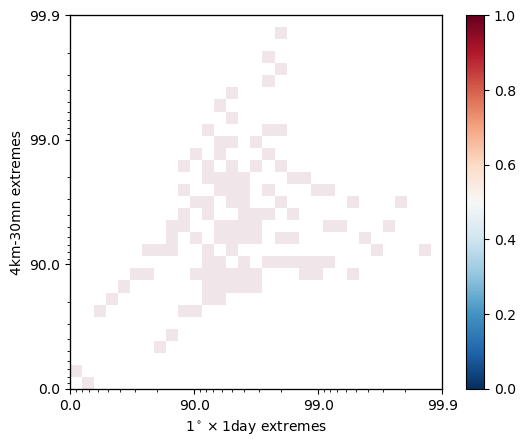

In [26]:
%matplotlib inline
data = A_max
jd.plot_data(data, noise, False)